# Import Packages & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

In [3]:
df = pd.read_csv('data/data.csv')

In [4]:
df.head()

,Gender,Age,Waist,Exercise,SunlightExposure,MilkConsumption,Height,BodyFat,BMI,Weight,BoneMass,Outcome
0,1,39,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,30.0,0.0,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# DAta Processing

In [5]:
features = df[['Gender','Age','Waist','Exercise','SunlightExposure','MilkConsumption','Height','BodyFat','BMI','Weight','BoneMass']]
features = features.fillna(features.mean())
input = features.values
output = df[['Outcome']].values

In [6]:
input

array([[  1.  ,  39.  ,   0.  , ...,  26.97,  80.  ,  77.  ],
       [  0.  ,  46.  ,   0.  , ...,  28.73,  95.  ,  76.  ],
       [  1.  ,  48.  ,  20.  , ...,  25.34,  75.  ,  70.  ],
       ...,
       [  0.  ,  52.  ,   0.  , ...,  21.47,  80.  , 107.  ],
       [  1.  ,  40.  ,   0.  , ...,  25.6 ,  67.  ,  72.  ],
       [  0.  ,  39.  ,  30.  , ...,  20.91,  85.  ,  80.  ]])

# Data Visualisation

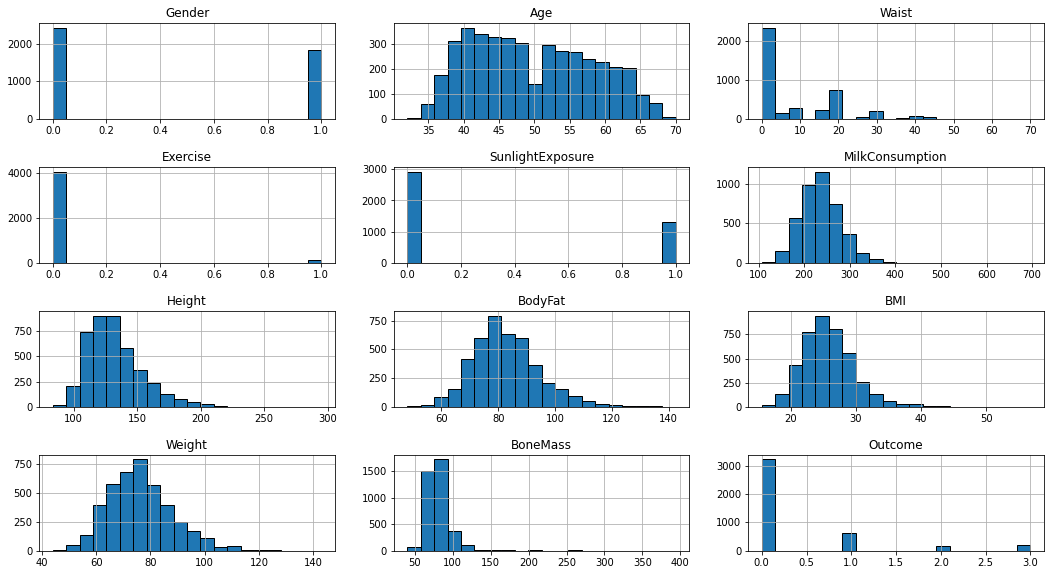

In [7]:
import itertools
from itertools import zip_longest
columns=df.columns[:13]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    df[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

# Analysis Of Outcome

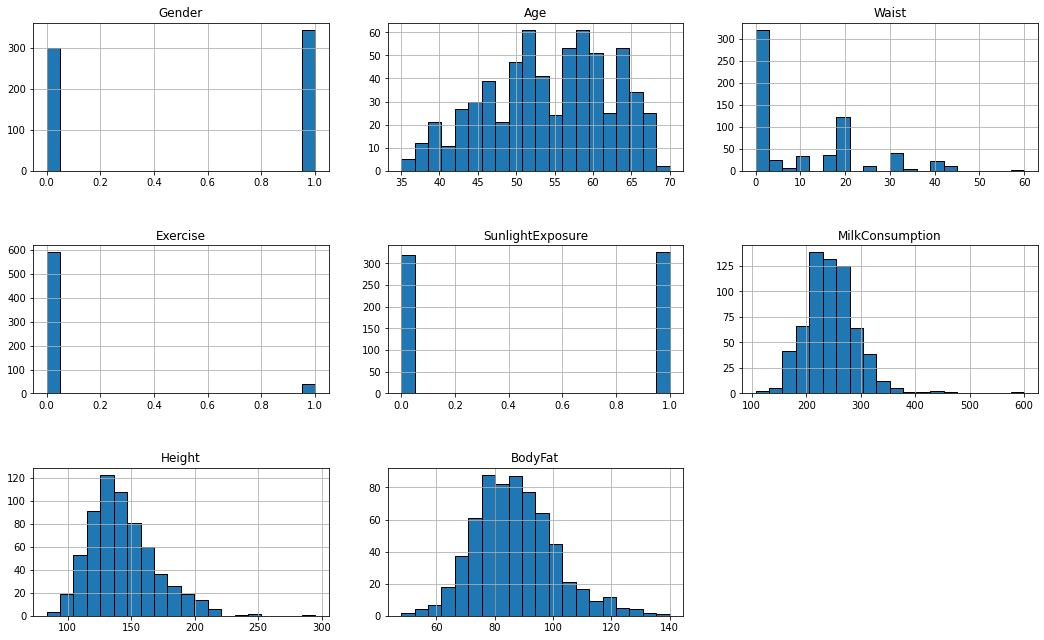

In [8]:
pima1=df[df['Outcome']==1]
columns=df.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    pima1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

Gender                 AxesSubplot(0.125,0.657941;0.133621x0.222059)
Age                 AxesSubplot(0.285345,0.657941;0.133621x0.222059)
Waist                AxesSubplot(0.44569,0.657941;0.133621x0.222059)
Exercise            AxesSubplot(0.606034,0.657941;0.133621x0.222059)
SunlightExposure    AxesSubplot(0.766379,0.657941;0.133621x0.222059)
MilkConsumption        AxesSubplot(0.125,0.391471;0.133621x0.222059)
Height              AxesSubplot(0.285345,0.391471;0.133621x0.222059)
BodyFat              AxesSubplot(0.44569,0.391471;0.133621x0.222059)
BMI                 AxesSubplot(0.606034,0.391471;0.133621x0.222059)
Weight              AxesSubplot(0.766379,0.391471;0.133621x0.222059)
BoneMass                  AxesSubplot(0.125,0.125;0.133621x0.222059)
Outcome                AxesSubplot(0.285345,0.125;0.133621x0.222059)
dtype: object

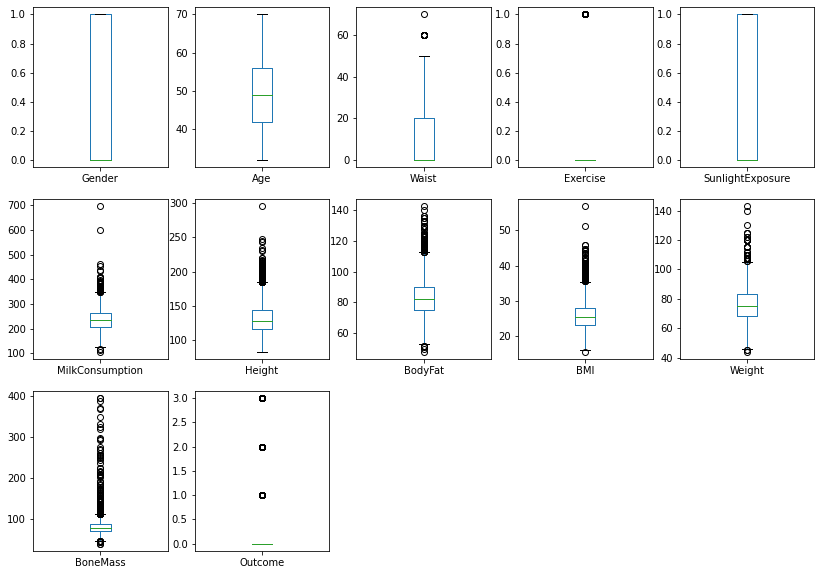

In [9]:
df.plot(kind= 'box' , subplots=True, layout=(3,5),figsize=(14,10))

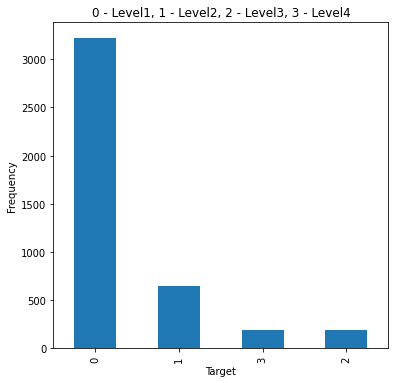

In [10]:
df['Outcome'].value_counts().plot(kind='bar', figsize=(6,6))
plt.title('0 - Level1, 1 - Level2, 2 - Level3, 3 - Level4')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

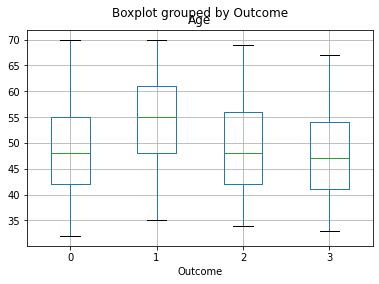

In [11]:
df.boxplot(column='Age',by='Outcome')
plt.show()

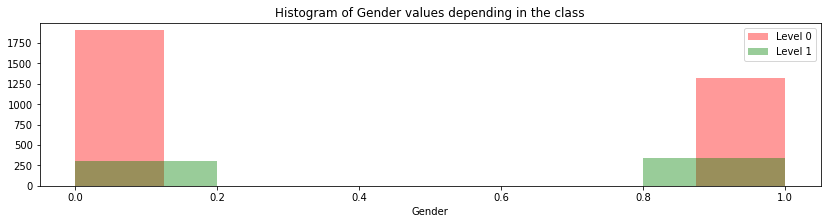

In [12]:
plt.figure(figsize=(14,3))
Insulin_plt = df.groupby(df['Gender']).Outcome.count().reset_index()
sns.distplot(df[df.Outcome == 0]['Gender'], color='red', kde=False, label='Level 0')
sns.distplot(df[df.Outcome == 1]['Gender'], color='green', kde=False, label='Level 1')
plt.legend()
plt.title('Histogram of Gender values depending in the class')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.3, random_state=101)

# OverSampling with SMOTE

In [15]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train , Y_train = sm.fit_sample(X_train, y_train.ravel())

In [16]:
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(Y_train.shape))

After OverSampling, the shape of train_X: (8972, 11)
After OverSampling, the shape of train_y: (8972,) 



# Support Vector Machine

In [17]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train, Y_train)
predictions = SVM.predict(X_test)
val1 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for SVM: ", val1, "\n")
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for SVM: ")
print(classification_report(y_test, predictions))

*Accuracy score for SVM:  17.92452830188679 

*Confusion Matrix for SVM: 
[[ 73 290 154 462]
 [  5 115  20  47]
 [  5  14  14  19]
 [  7  11  10  26]]
*Classification Report for SVM: 
              precision    recall  f1-score   support

           0       0.81      0.07      0.14       979
           1       0.27      0.61      0.37       187
           2       0.07      0.27      0.11        52
           3       0.05      0.48      0.09        54

    accuracy                           0.18      1272
   macro avg       0.30      0.36      0.18      1272
weighted avg       0.67      0.18      0.17      1272



# Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)
predictions = RF.predict(X_test)
val2 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for RF: ", val2, "\n")
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for RF: ")
print(classification_report(y_test, predictions))

*Accuracy score for RF:  72.16981132075472 

*Confusion Matrix for RF: 
[[875  76  23   5]
 [142  41   1   3]
 [ 47   3   2   0]
 [ 50   1   3   0]]
*Classification Report for RF: 
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       979
           1       0.34      0.22      0.27       187
           2       0.07      0.04      0.05        52
           3       0.00      0.00      0.00        54

    accuracy                           0.72      1272
   macro avg       0.30      0.29      0.29      1272
weighted avg       0.66      0.72      0.68      1272



# DecisionTreeClassifier

In [19]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)
predictions = DT.predict(X_test)
val3 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for DT: ", val3, "\n")
print("*Confusion Matrix for DT: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for DT: ")
print(classification_report(y_test, predictions))

*Accuracy score for DT:  56.60377358490566 

*Confusion Matrix for DT: 
[[658 164  86  71]
 [109  54  13  11]
 [ 36   7   6   3]
 [ 42   5   5   2]]
*Classification Report for DT: 
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       979
           1       0.23      0.29      0.26       187
           2       0.05      0.12      0.07        52
           3       0.02      0.04      0.03        54

    accuracy                           0.57      1272
   macro avg       0.27      0.28      0.27      1272
weighted avg       0.64      0.57      0.60      1272



# KNeighborsClassifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)
predictions = KNN.predict(X_test)
val4 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for KNN: ", val4, "\n")
print("*Confusion Matrix for KNN: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for KNN: ")
print(classification_report(y_test, predictions))

*Accuracy score for KNN:  41.74528301886792 

*Confusion Matrix for KNN: 
[[427 243 134 175]
 [ 49  82  30  26]
 [ 22  11  13   6]
 [ 24  12   9   9]]
*Classification Report for KNN: 
              precision    recall  f1-score   support

           0       0.82      0.44      0.57       979
           1       0.24      0.44      0.31       187
           2       0.07      0.25      0.11        52
           3       0.04      0.17      0.07        54

    accuracy                           0.42      1272
   macro avg       0.29      0.32      0.26      1272
weighted avg       0.67      0.42      0.49      1272



# LogisticRegression

In [21]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, Y_train)
predictions = LR.predict(X_test)
val5 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for LR: ", val5, "\n")
print("*Confusion Matrix for LR: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for LR: ")
print(classification_report(y_test, predictions))

*Accuracy score for LR:  24.056603773584907 

*Confusion Matrix for LR: 
[[176 294 239 270]
 [ 19  95  43  30]
 [ 14  15  17   6]
 [  9  18   9  18]]
*Classification Report for LR: 
              precision    recall  f1-score   support

           0       0.81      0.18      0.29       979
           1       0.23      0.51      0.31       187
           2       0.06      0.33      0.09        52
           3       0.06      0.33      0.10        54

    accuracy                           0.24      1272
   macro avg       0.29      0.34      0.20      1272
weighted avg       0.66      0.24      0.28      1272



# MLP - ANN Classifier

In [22]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier()
MLP.fit(X_train, Y_train)
predictions = MLP.predict(X_test)
val6 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for MLP: ", val6, "\n")
print("*Confusion Matrix for MLP: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for MLP: ")
print(classification_report(y_test, predictions))

*Accuracy score for MLP:  30.50314465408805 

*Confusion Matrix for MLP: 
[[272 289  78 340]
 [ 30  95  19  43]
 [ 24  12   5  11]
 [ 16  18   4  16]]
*Classification Report for MLP: 
              precision    recall  f1-score   support

           0       0.80      0.28      0.41       979
           1       0.23      0.51      0.32       187
           2       0.05      0.10      0.06        52
           3       0.04      0.30      0.07        54

    accuracy                           0.31      1272
   macro avg       0.28      0.29      0.22      1272
weighted avg       0.65      0.31      0.37      1272



# SGD Classifier

In [23]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)
val7 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for SGD: ", val7, "\n")
print("*Confusion Matrix for SGD: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for SGD: ")
print(classification_report(y_test, predictions))

*Accuracy score for SGD:  4.245283018867925 

*Confusion Matrix for SGD: 
[[  0   0   0 979]
 [  0   0   0 187]
 [  0   0   0  52]
 [  0   0   0  54]]
*Classification Report for SGD: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       979
           1       0.00      0.00      0.00       187
           2       0.00      0.00      0.00        52
           3       0.04      1.00      0.08        54

    accuracy                           0.04      1272
   macro avg       0.01      0.25      0.02      1272
weighted avg       0.00      0.04      0.00      1272



# GaussianNB

In [24]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, Y_train)
predictions = GNB.predict(X_test)
val8 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for GNB: ", val8, "\n")
print("*Confusion Matrix for GNB: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for GNB: ")
print(classification_report(y_test, predictions))

*Accuracy score for GNB:  14.779874213836477 

*Confusion Matrix for GNB: 
[[ 84 144 184 567]
 [ 17  71  30  69]
 [  7   7   7  31]
 [  7   7  14  26]]
*Classification Report for GNB: 
              precision    recall  f1-score   support

           0       0.73      0.09      0.15       979
           1       0.31      0.38      0.34       187
           2       0.03      0.13      0.05        52
           3       0.04      0.48      0.07        54

    accuracy                           0.15      1272
   macro avg       0.28      0.27      0.15      1272
weighted avg       0.61      0.15      0.17      1272



# Extra Trees Classifier

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
ET = ExtraTreesClassifier(n_estimators=100, random_state=0)
ET.fit(X_train, Y_train)
predictions = ET.predict(X_test)
val9 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for ET: ", val9, "\n")
print("*Confusion Matrix for ET: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for ET: ")
print(classification_report(y_test, predictions))

*Accuracy score for ET:  73.27044025157232 

*Confusion Matrix for ET: 
[[893  58  22   6]
 [144  39   3   1]
 [ 46   5   0   1]
 [ 49   4   1   0]]
*Classification Report for ET: 
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       979
           1       0.37      0.21      0.27       187
           2       0.00      0.00      0.00        52
           3       0.00      0.00      0.00        54

    accuracy                           0.73      1272
   macro avg       0.29      0.28      0.28      1272
weighted avg       0.66      0.73      0.69      1272



# Gradient Boosting Classifier

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier().fit(X_train, Y_train)
pred = GB.predict(X_test)
val10 = (GB.score(X_test, y_test)) * 100
print("Accuracy: %s" % str(GB.score(X_test, y_test)))
print("Confusion Matrix")
print(confusion_matrix(pred, y_test))
print("*Classification Report for GB ")
print(classification_report(y_test, pred))

Accuracy: 0.6839622641509434
Confusion Matrix
[[817 133  44  47]
 [102  48   4   5]
 [ 37   2   4   1]
 [ 23   4   0   1]]
*Classification Report for GB 
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       979
           1       0.30      0.26      0.28       187
           2       0.09      0.08      0.08        52
           3       0.04      0.02      0.02        54

    accuracy                           0.68      1272
   macro avg       0.30      0.30      0.30      1272
weighted avg       0.65      0.68      0.67      1272



# AdaBoostClassifier

In [27]:
from sklearn.ensemble import AdaBoostClassifier
AB = AdaBoostClassifier().fit(X_train, Y_train)
pred = AB.predict(X_test)
val11 = (AB.score(X_test, y_test)) * 100
print("Accuracy: %s" % str(AB.score(X_test, y_test)))
print("Confusion Matrix")
print(confusion_matrix(pred, y_test))
print("*Classification Report for AB ")
print(classification_report(y_test, pred))

Accuracy: 0.5550314465408805
Confusion Matrix
[[610  86  35  29]
 [207  84   7  13]
 [ 99  11   7   7]
 [ 63   6   3   5]]
*Classification Report for AB 
              precision    recall  f1-score   support

           0       0.80      0.62      0.70       979
           1       0.27      0.45      0.34       187
           2       0.06      0.13      0.08        52
           3       0.06      0.09      0.08        54

    accuracy                           0.56      1272
   macro avg       0.30      0.32      0.30      1272
weighted avg       0.66      0.56      0.60      1272



# Accuracy Comparsion

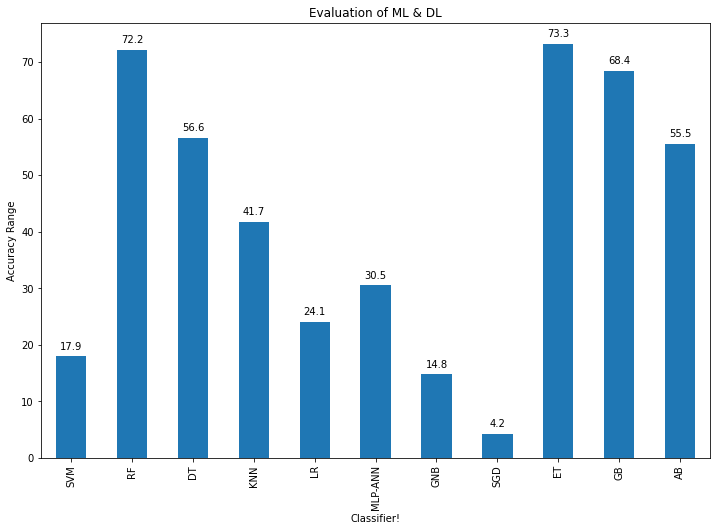

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Bring some raw data.
frequencies = [val1,val2,val3,val4,val5,val6,val8,val7,val9,val10,val11]

# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
freq_series = pd.Series(frequencies)

x_labels = ['SVM', 'RF','DT','KNN','LR','MLP-ANN','GNB','SGD','ET','GB','AB']

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Evaluation of ML & DL')
ax.set_xlabel('Classifier!')
ax.set_ylabel('Accuracy Range')
ax.set_xticklabels(x_labels)


def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)
plt.show()
#plt.savefig("image.png")

In [29]:
import joblib
filename = 'data/model_RF.sav'
joblib.dump(RF, filename)

['data/model_RF.sav']

In [30]:
import joblib
filename = 'data/model_ET.sav'
joblib.dump(ET, filename)

['data/model_ET.sav']